In [92]:
%load_ext autoreload
%autoreload 2

In [87]:
from src.data.load import load_data
from src.visualization.visualize import plot_confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import numpy as np
from tqdm.notebook import tqdm
import pandas as pd

import seaborn as sn
import matplotlib.pyplot as plt

In [8]:
train, test = load_data('../data/processed')

In [11]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [63]:
X = train[['question1', 'question2']]
y = train['is_duplicate']

y_pred = []


for index, row in tqdm(X.iterrows(), total=X.shape[0]):
    vectorizer = TfidfVectorizer()
    matrix = vectorizer.fit_transform(list(row))
    score = linear_kernel(matrix[0], matrix[1]).flatten()
    y_pred.append(np.round(score))

0.6516632985972836

In [64]:
print(f'Accuracy score : {accuracy_score(y, y_pred)}')

Accuracy score : 0.6516632985972836


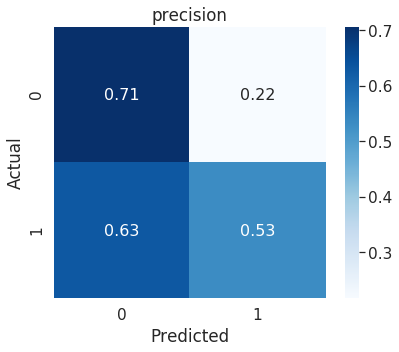

In [100]:
plot_confusion_matrix(y, y_pred, metric='precision')

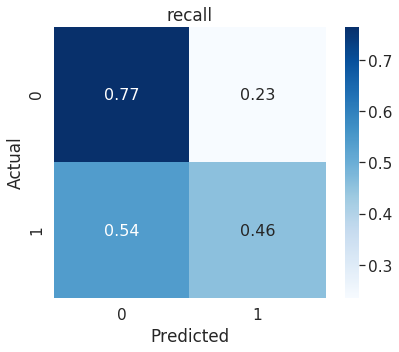

In [101]:
plot_confusion_matrix(y, y_pred, metric='recall')

In [83]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.73    255024
           1       0.53      0.46      0.49    149263

    accuracy                           0.65    404287
   macro avg       0.62      0.61      0.61    404287
weighted avg       0.64      0.65      0.65    404287

